In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

df=pd.read_csv("meesho.csv")
conn=sql.connect("meesho.db")
df.to_sql("meesho", conn, if_exists="replace", index=False)

query="""
SELECT * FROM meesho;"""

pd.read_sql(query, conn)



,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03,322259568161_1,Delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27,475133679575_1,Cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458
...,...,...,...,...,...,...,...,...,...
133,2022-08-30,271046524562_1,Shipped,Delhi,110009,66.68,1400,110,1510
134,2022-08-15,346130315989_1,Return,Andhra Pradesh,532005,64.30,1350,114,1464
135,2022-08-11,312073496064_1,rto,Telangana,500052,66.68,1400,110,1525
136,2022-08-02,916538974169_1,rto,Assam,782435,88.62,1861,0,1861


#TOP 5 state generate highest revenue

In [ ]:
query="""
SELECT state,SUM(price) AS Revenue
FROM meesho
GROUP BY state
ORDER BY REVENUE DESC
LIMIT 5;"""

revenue_df = pd.read_sql(query,conn)
display(revenue_df)

,state,Revenue
0,Uttar Pradesh,14958
1,Tamil Nadu,13904
2,Madhya Pradesh,13261
3,West Bengal,12031
4,Telangana,11325


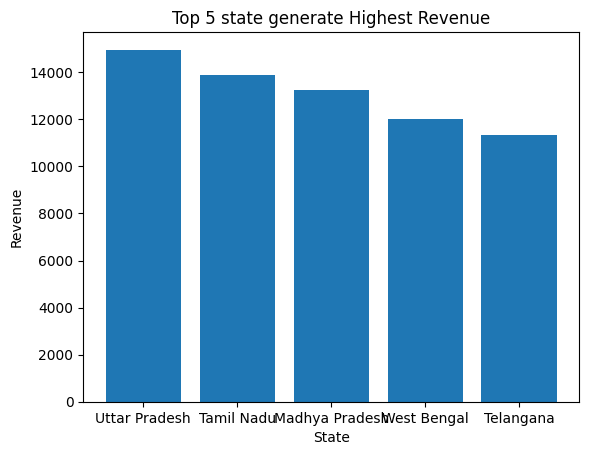

In [ ]:
plt.bar(revenue_df['state'], revenue_df['Revenue'])
plt.xlabel("State")
plt.ylabel("Revenue")
plt.title("Top 5 state generate Highest Revenue")
plt.show()

#UNIQUE STATES

In [ ]:
query="""
SELECT DISTINCT state FROM meesho"""

Unique_city=pd.read_sql(query,conn)
display(Unique_city)

,state
0,Jammu & Kashmir
1,Uttar Pradesh
2,Telangana
3,Odisha
4,Maharashtra
5,West Bengal
6,Andhra Pradesh
7,Assam
8,Chandigarh
9,Delhi


#HOW Many Orders were shipped,delivered,cancelled,and RTO?

In [ ]:
querry="""
SELECT order_status , COUNT(*) AS total_orders
FROM meesho
GROUP BY order_status
ORDER BY COUNT(*) DESC
"""

Order_Satus=pd.read_sql(querry,conn)
display(Order_Satus)

,order_status,total_orders
0,Delivered,50
1,Return,34
2,Shipped,26
3,rto,22
4,Cancelled,4
5,Exchange,2


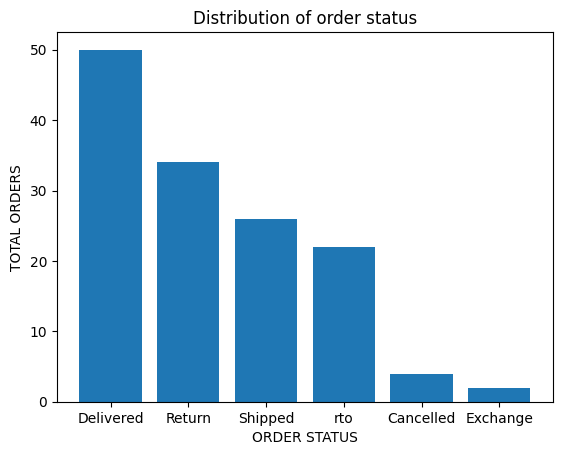

In [ ]:
plt.bar(Order_Satus['order_status'], Order_Satus['total_orders'])
plt.xlabel("ORDER STATUS")
plt.ylabel("TOTAL ORDERS")
plt.title("Distribution of order status")
plt.show()

#TOP 5 STATE BY ORDERS

In [ ]:
query="""
SELECT state, COUNT(*) AS total_orders
FROM meesho
GROUP BY state
ORDER BY COUNT(*) DESC
LIMIT 5

"""

state_order=pd.read_sql(query,conn)
display(state_order)

,state,total_orders
0,Uttar Pradesh,11
1,Tamil Nadu,10
2,West Bengal,9
3,Telangana,9
4,Madhya Pradesh,8


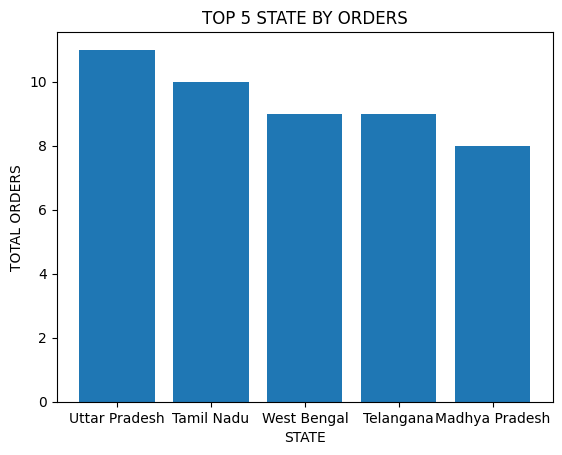

In [ ]:
plt.bar(state_order['state'], state_order['total_orders'])
plt.xlabel("STATE")
plt.ylabel("TOTAL ORDERS")
plt.title("TOP 5 STATE BY ORDERS")
plt.show()

#TOP 5 state by avg order value

In [ ]:
query="""
SELECT state, AVG(price) AS Average_order_value
FROM meesho
GROUP BY state
ORDER BY AVG(price) DESC
LIMIT 5

"""

state_AVG_order=pd.read_sql(query,conn)
display(state_AVG_order)

,state,Average_order_value
0,Chandigarh,2456.000
1,punjab,2097.000
2,Haryana,1847.000
3,Up,1697.000
4,Madhya Pradesh,1657.625


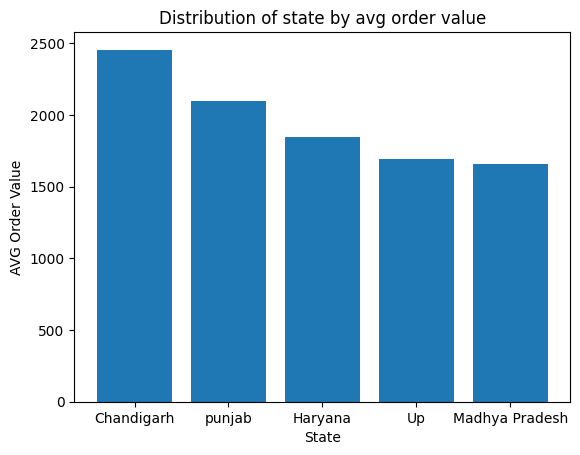

In [ ]:
plt.bar(state_AVG_order['state'], state_AVG_order['Average_order_value'])
plt.xlabel("State")
plt.ylabel("AVG Order Value")
plt.title("Distribution of state by avg order value")
plt.show()

#Top 5 State-PIN Combinations by Revenue

In [ ]:
query="""
SELECT state,pin,SUM(price) AS Revenue
FROM meesho
GROUP BY state,pin
ORDER BY REVENUE DESC
LIMIT 5;"""

revenue_df_pin = pd.read_sql(query,conn)
display(revenue_df_pin)

,state,pin,Revenue
0,Gujarat,382415,4944
1,Madhya Pradesh,465674,3280
2,Madhya Pradesh,452002,2916
3,West Bengal,711227,2828
4,Chandigarh,144402,2456


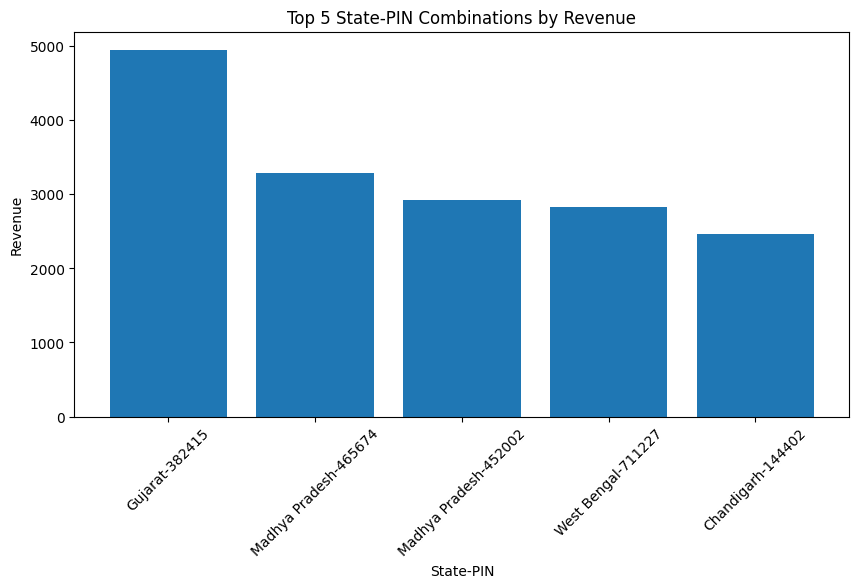

In [ ]:
revenue_df_pin['state_pin'] = revenue_df_pin['state'] + "-" + revenue_df_pin['pin'].astype(str)

plt.figure(figsize=(10,5))
plt.bar(revenue_df_pin['state_pin'], revenue_df_pin['Revenue'])
plt.xticks(rotation=45)
plt.xlabel("State-PIN")
plt.ylabel("Revenue")
plt.title("Top 5 State-PIN Combinations by Revenue")
plt.show()

#Cancelled and Rto Order

In [6]:
query="""
SELECT
ROUND(
  SUM(CASE
  WHEN order_status IN ('Cancelled', 'rto') THEN 1 ELSE 0
  END)*100.0/COUNT(*),2
) AS cancel_rto_percentage
FROM meesho
"""

cancel_rto_percentage=pd.read_sql(query,conn)
display(cancel_rto_percentage)

,cancel_rto_percentage
0,18.84


In [8]:
query="""
SELECT
CASE
WHEN LOWER(order_status) IN ('cancelled', 'return','rto') THEN 'Failed Orders'
ELSE 'Successful Orders'
END AS order_type,
ROUND(COUNT(*)*100/(SELECT COUNT(*) FROM meesho),2) AS percentage
FROM meesho

GROUP BY order_type;


"""

failed_successful_order=pd.read_sql(query,conn)
display(failed_successful_order)

,order_type,percentage
0,Failed Orders,43.0
1,Successful Orders,56.0


#Percentage of Successful and Failed Orders

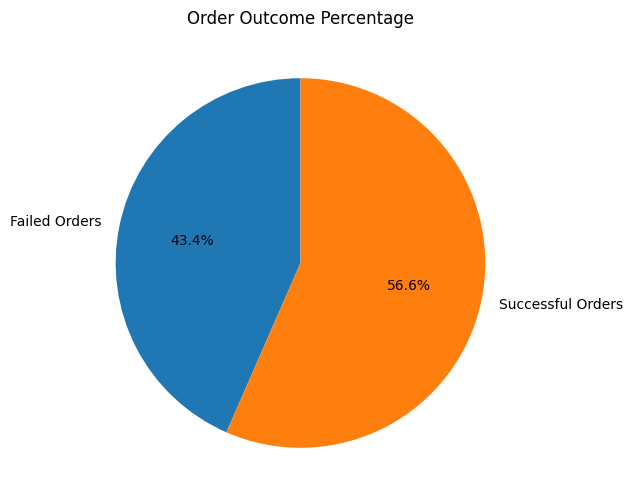

In [12]:
plt.figure(figsize=(6,6))
plt.pie(
    failed_successful_order['percentage'],
    labels=failed_successful_order['order_type'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Order Outcome Percentage")
plt.show()

#Which State Has The highest Number Of Failed Orders

In [24]:
query="""
SELECT
    state,
    COUNT(*) AS failed_order_count
FROM
    meesho
WHERE
    LOWER(order_status) IN ('cancelled', 'return', 'rto')
GROUP BY
    state
ORDER BY
    failed_order_count DESC;
"""

failed_order_state=pd.read_sql(query,conn)
display(failed_order_state)

,state,failed_order_count
0,West Bengal,5
1,Uttar Pradesh,5
2,Tamil Nadu,5
3,Madhya Pradesh,5
4,Andhra Pradesh,5
5,Telangana,4
6,Kerala,4
7,Odisha,3
8,Delhi,3
9,Assam,3


#Which state has the highest RTO count

In [33]:
query="""
SELECT state,
COUNT(*) AS RTO_Count
FROM meesho

WHERE
Lower(order_status) IN ('rto')
GROUP BY state
ORDER BY RTO_Count DESC
"""
pd.read_sql(query,conn)

,state,RTO_Count
0,Andhra Pradesh,4
1,Uttar Pradesh,3
2,Telangana,2
3,Madhya Pradesh,2
4,Delhi,2
5,Assam,2
6,seoni,1
7,West Bengal,1
8,Odisha,1
9,Kerala,1
